In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/rafiki/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [22]:

E = {'a': 0.08167, 'e':0.12702, 'i':0.06966, 'o':0.07507, 'u':0.02758, 'y':0.01974, "other":0.59926}
P = {'a': 0.10503, 'e':0.07352, 'i':0.08328, 'o':0.02445, 'u':0.02062, 'y':0.03206, "other":0.66104}
S = {'a': 0.11525, 'e':0.12181, 'i':0.06247, 'o':0.08683, 'u':0.02927, 'y':0.01008, "other":0.57429}

pe = np.log(1 / 3.0)
pp = np.log(1 / 3.0)
ps = np.log(1 / 3.0)

#pe = np.log(0.5)
#pp = np.log(0.2)
#ps = np.log(0.3)

L = {'English' : (E, pe), 'Polish' : (P, pp), 'Spanish' : (S, ps)}

for l in L:        
    d = L[l][0]
    for k in d:
        d[k] = np.log(d[k])

def get_val(L, c):
    if c in L:
        return L[c]
    else:
        return L["other"]
        
def get_p_of_int(L, pl, s):
    return pl + np.sum(get_val(L, c) for c in s)

def classify(s):
    best = float("-inf")
    for l in L:
        p = get_p_of_int(L[l][0], L[l][1], s)
        print(s, l, p, best)
        if p > best:
            ans = l
            best = p
    return ans

exa = ["bull", "burro", "kurczak", "pollo", "litwo, ojczyzno moja, ty jesteś jak zdrowie", "dinero",
       "mama just killed a man put a gun against his head", "maradona es mas grande que pele"]

for e in exa:
    print(e, classify(e))
    
print(L)


('bull', 'Polish', -6.2219288688290577, -inf)
('bull', 'Spanish', -6.2936668182434392, -6.2219288688290577)
('bull', 'English', -6.2254558501275046, -6.2219288688290577)
('bull', 'Polish')
('burro', 'Polish', -9.9330539318903135, -inf)
('burro', 'Spanish', -8.7374699131530225, -9.9330539318903135)
('burro', 'English', -8.8147901175247299, -8.7374699131530225)
('burro', 'Spanish')
('kurczak', 'Polish', -9.303319977354926, -inf)
('kurczak', 'Spanish', -9.5635599828801414, -9.303319977354926)
('kurczak', 'English', -9.7546438283010648, -9.303319977354926)
('kurczak', 'Polish')
('pollo', 'Polish', -9.7626851945582462, -inf)
('pollo', 'Spanish', -7.6500808297842626, -9.7626851945582462)
('pollo', 'English', -7.8134599783049756, -7.6500808297842626)
('pollo', 'Spanish')
('litwo, ojczyzno moja, ty jeste\xc5\x9b jak zdrowie', 'Polish', -56.261463288101936, -inf)
('litwo, ojczyzno moja, ty jeste\xc5\x9b jak zdrowie', 'Spanish', -55.333974653838631, -56.261463288101936)
('litwo, ojczyzno moja, t

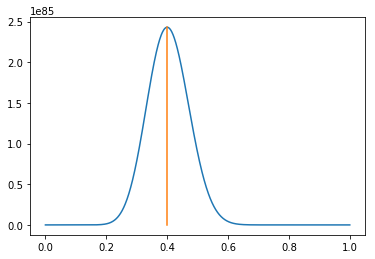

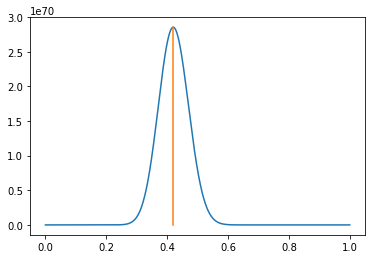

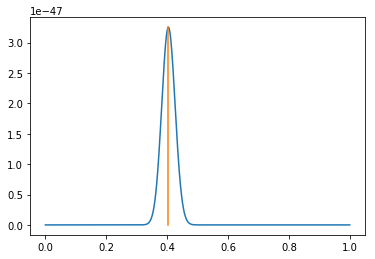

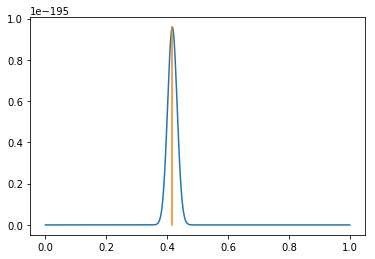

In [11]:
mean = 0.4

def lhood(p, s, n):
    return (p ** s) * (1 - p) ** (n - s) * (1e100)

def attempt(n):
    s = np.sum(np.random.rand() < mean for i in range(n))
    plt.plot(np.linspace(0.0, 1.0, 1000), [lhood(p, s, n) for p in np.linspace(0.0, 1.0, 1000)])
    plt.plot([1.0 * s / n, 1.0 * s / n], [0.0, np.amax([lhood(p, s, n) for p in np.linspace(0.0, 1.0, 1000)])])
    plt.show()
attempt(50)
attempt(100)
attempt(500)
attempt(1000)

In [20]:
s = "PPRSSRSPPRSPRRSPPPSSPRSPSPSRSP"
moves = ['P', 'R', 'S']
pb1 = {}
pb2 = {}
for m1 in moves:
    pb1[m1] = {}
    for m2 in moves:
        pb1[m1][m2] = 1.0 * np.sum([(s[i] == m1 and s[i + 1] == m2) for i in range(len(s) - 1)]) / np.sum([s[i] == m1 for i in range(len(s) - 1)]) 
    pb2[m1] = 1.0 * np.sum([s[i] == m1 for i in range(len(s))]) / len(s)
        
print(pb1)
print(pb2)
        
def get_mv1(prev):
    a = np.random.rand()
    cdf = 0.0
    for m in pb1[prev]:
        cdf += pb1[prev][m]
        if cdf > a:
            return m
def get_mv2():
    a = np.random.rand()
    cdf = 0.0
    for m in pb2:
        cdf += pb2[m]
        if cdf > a:
            return m

klap = 'R'
score = 0

def wins(mv1, mv2):
    return (mv1 == 'P' and mv2 == 'R') or (mv1 == 'R' and mv2 == 'S') or (mv1 == 'S' and mv2 == 'P')

def get_res(mv1, mv2):
    if wins(mv1, mv2):
        return 1
    elif wins(mv2, mv1):
        return -1
    return 0
    
    

for i in range(1000000):
    klap = get_mv1(klap)
    trurl = get_mv2()
    score += get_res(klap, trurl)
print score
    

{'P': {'P': 0.36363636363636365, 'S': 0.2727272727272727, 'R': 0.36363636363636365}, 'S': {'P': 0.6363636363636364, 'S': 0.18181818181818182, 'R': 0.18181818181818182}, 'R': {'P': 0.0, 'S': 0.8571428571428571, 'R': 0.14285714285714285}}
{'P': 0.4, 'S': 0.36666666666666664, 'R': 0.23333333333333334}
5336
